In [1]:
#!wget https://github.com/Emirhankayar/churnpred/raw/refs/heads/main/data.xlsx

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001.0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002.0,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003.0,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004.0,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005.0,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5628 non-null   float64
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5628 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

EDA


In [5]:
df.describe(percentiles=[.01,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
CustomerID,5628.0,52814.549041,1624.890759,50001.0,50057.27,50563.70,51407.75,52814.50,54221.2500,55065.30,55346.6500,55573.7300,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.00,0.00,0.0000,1.00,1.0000,1.0000,1.0
Tenure,5366.0,10.189899,8.557241,0.0,0.00,1.00,2.00,9.00,16.0000,23.00,27.0000,30.0000,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,1.00,1.00,3.0000,3.00,3.0000,3.0000,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,6.00,7.00,9.00,14.00,20.0000,30.00,33.0000,35.0000,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,2.00,2.00,3.00,3.0000,4.00,4.0000,4.0000,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,1.00,3.00,3.00,4.00,4.0000,5.00,5.0000,6.0000,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,1.00,1.00,2.00,3.00,4.0000,5.00,5.0000,5.0000,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,1.00,2.00,2.00,3.00,6.0000,8.00,10.0000,11.0000,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,0.00,0.00,1.0000,1.00,1.0000,1.0000,1.0


In [6]:
# break variables into categorical and numerical
categorical_cols = (df.dtypes[df.dtypes == 'object'].index)
numerical_cols = (df.dtypes[df.dtypes != 'object'].index).drop('CustomerID')

In [7]:
# Check unique values of each column in the dataset using a for loop
for column in categorical_cols:
        print("Column: {} - Unique Values: {}".format(column, df[column].unique()))
        print("="*80)

Column: PreferredLoginDevice - Unique Values: ['Mobile Phone' 'Phone' 'Computer' 'N.A.']
Column: PreferredPaymentMode - Unique Values: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Column: Gender - Unique Values: ['Female' 'Male' nan]
Column: PreferedOrderCat - Unique Values: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Column: MaritalStatus - Unique Values: ['Single' 'Divorced' 'Married' 'Widow']


In [8]:
for column in numerical_cols:
        print("Column: {} - Unique Values: {}".format(column, df[column].unique()))
        print("="*80)

Column: Churn - Unique Values: [1 0]
Column: Tenure - Unique Values: [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
Column: CityTier - Unique Values: [3 1 2]
Column: WarehouseToHome - Unique Values: [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
Column: HourSpendOnApp - Unique Values: [ 3.  2. nan  1.  0.  4.  5.]
Column: NumberOfDeviceRegistered - Unique Values: [3 4 5 2 1 6]
Column: SatisfactionScore - Unique Values: [2 3 5 4 1]
Column: NumberOfAddress - Unique Values: [ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]
Column: Complain - Unique Values: [1 0]
Column: OrderAmountHikeFromlastYear - Unique Values: [11. 15. 14. 23. 22. 16. 12. nan 13. 17. 18. 24. 19. 20. 21. 25. 26.]
Column: CouponUsed - Unique Values: [ 1.  0.  4.  2.  9.  6. 11. nan  7. 12. 

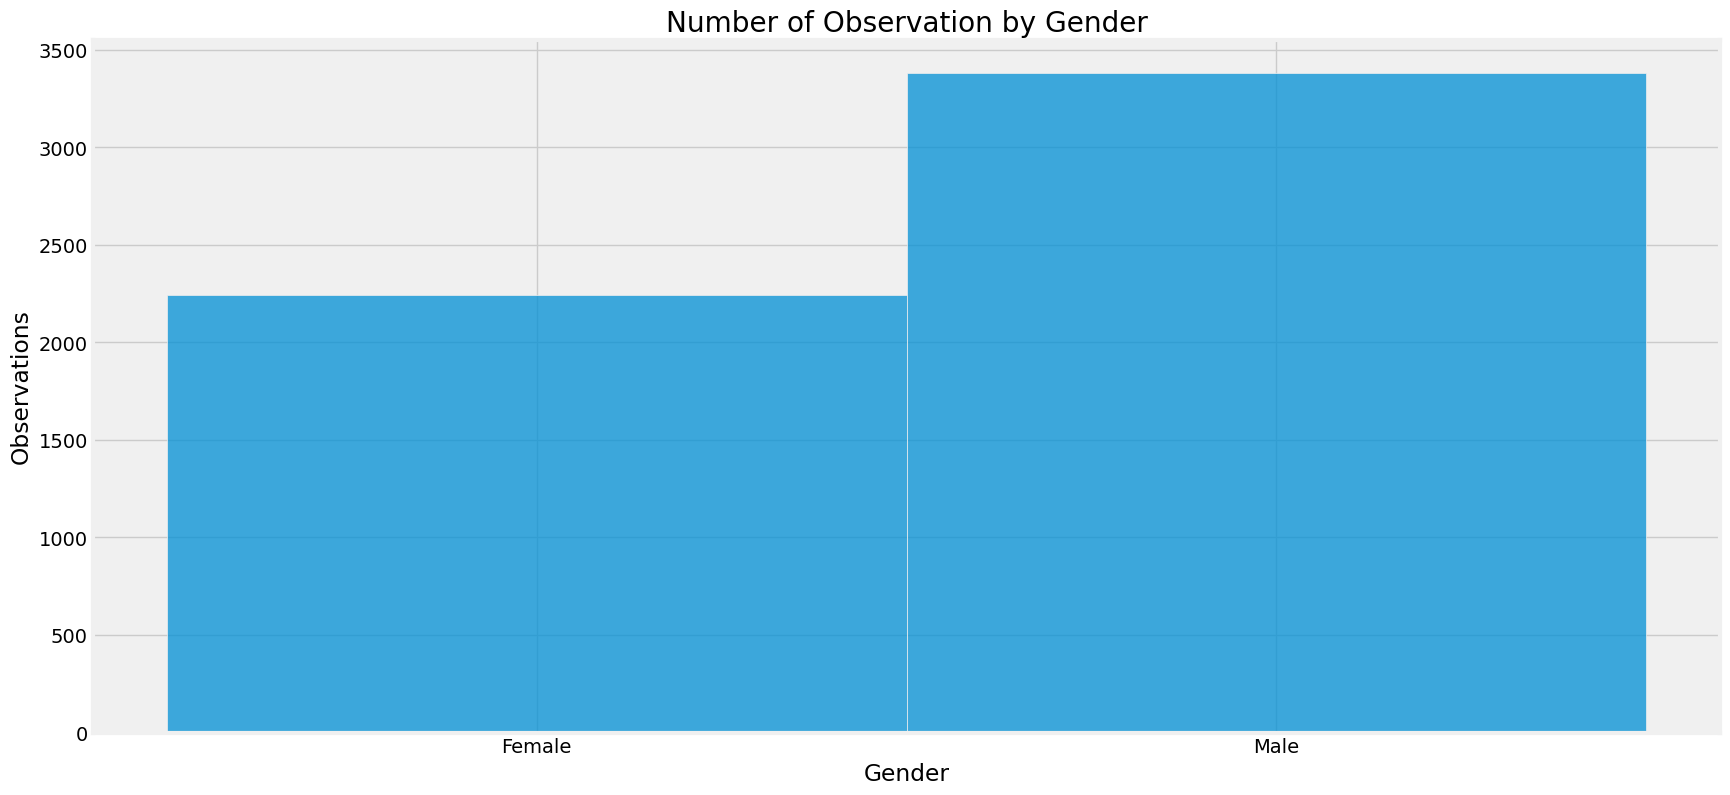

In [9]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Observations')
plt.title('Number of Observation by Gender')
plt.show()

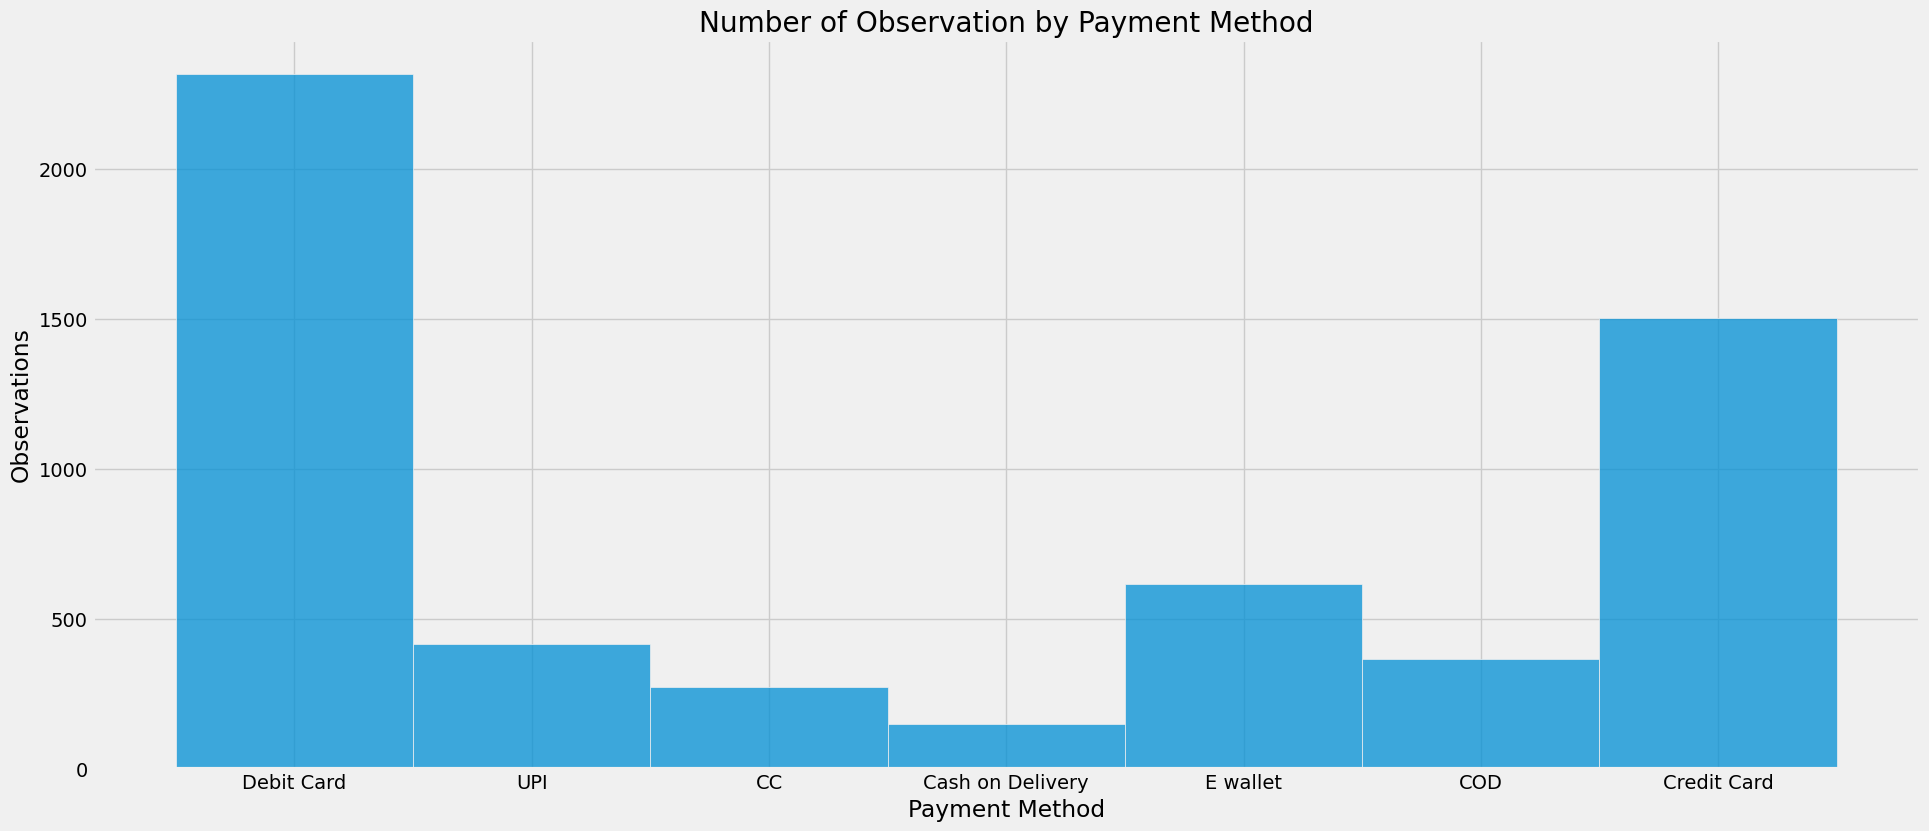

In [10]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(x='PreferredPaymentMode', data=df.fillna('NA'))
plt.xlabel('Payment Method')
plt.ylabel('Observations')
plt.title('Number of Observation by Payment Method')
plt.show()

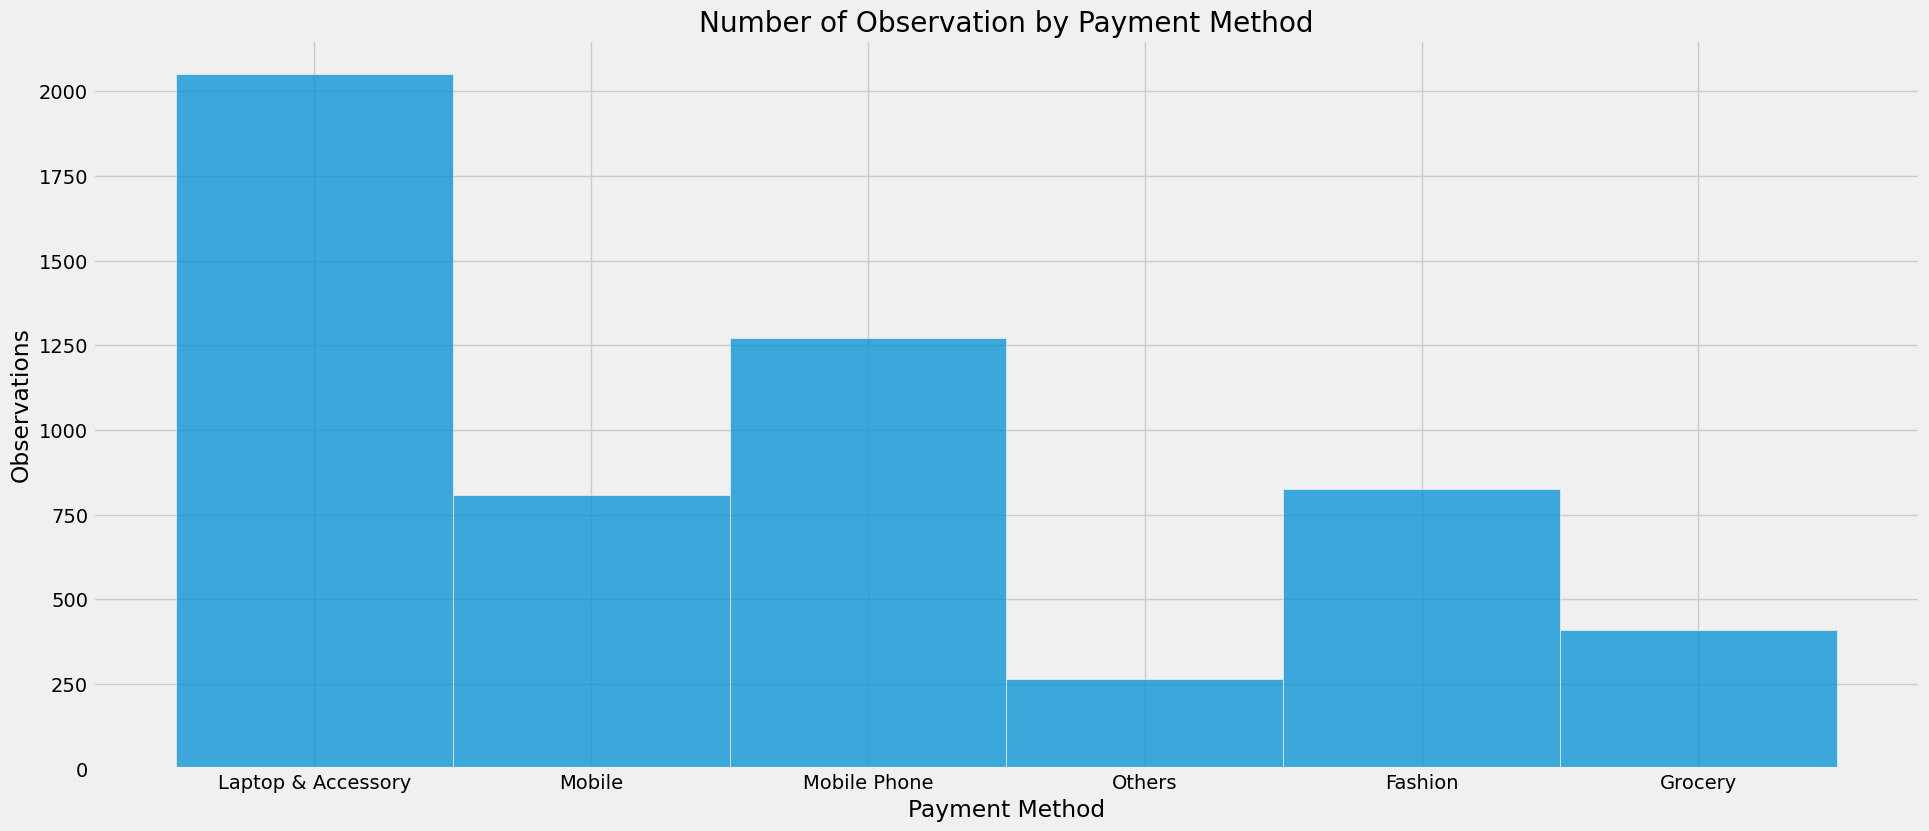

In [11]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(x='PreferedOrderCat', data=df.fillna('NA'))
plt.xlabel('Payment Method')
plt.ylabel('Observations')
plt.title('Number of Observation by Payment Method')
plt.show()

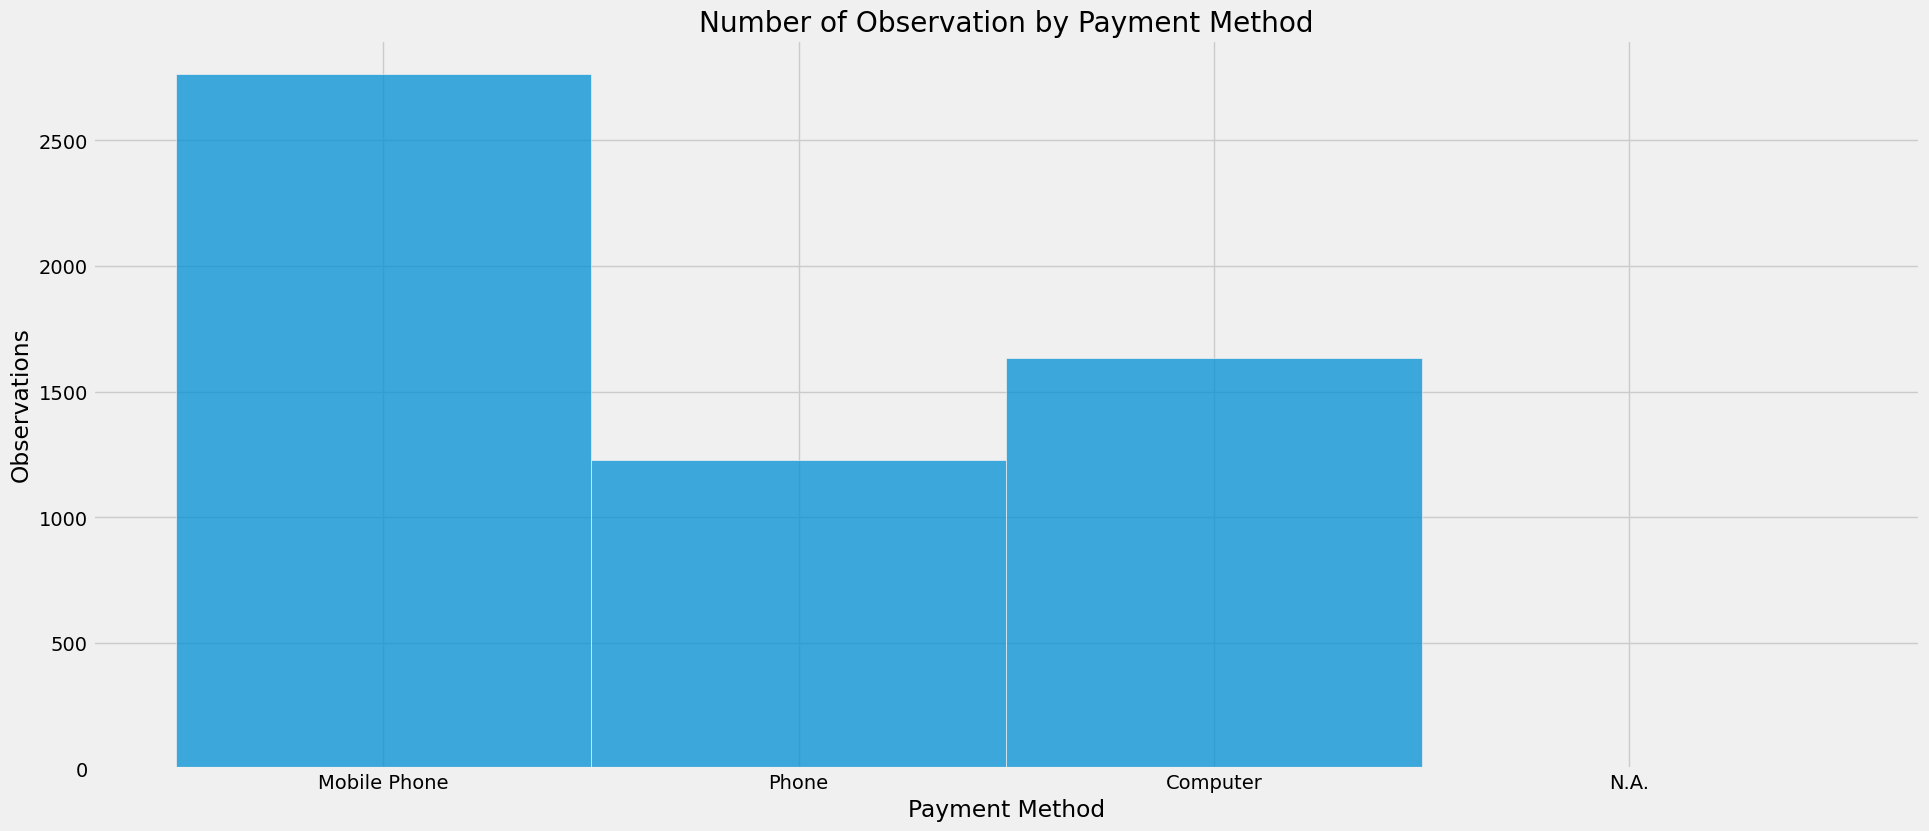

In [12]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(x='PreferredLoginDevice', data=df.fillna('NA'))
plt.xlabel('Payment Method')
plt.ylabel('Observations')
plt.title('Number of Observation by Payment Method')
plt.show()

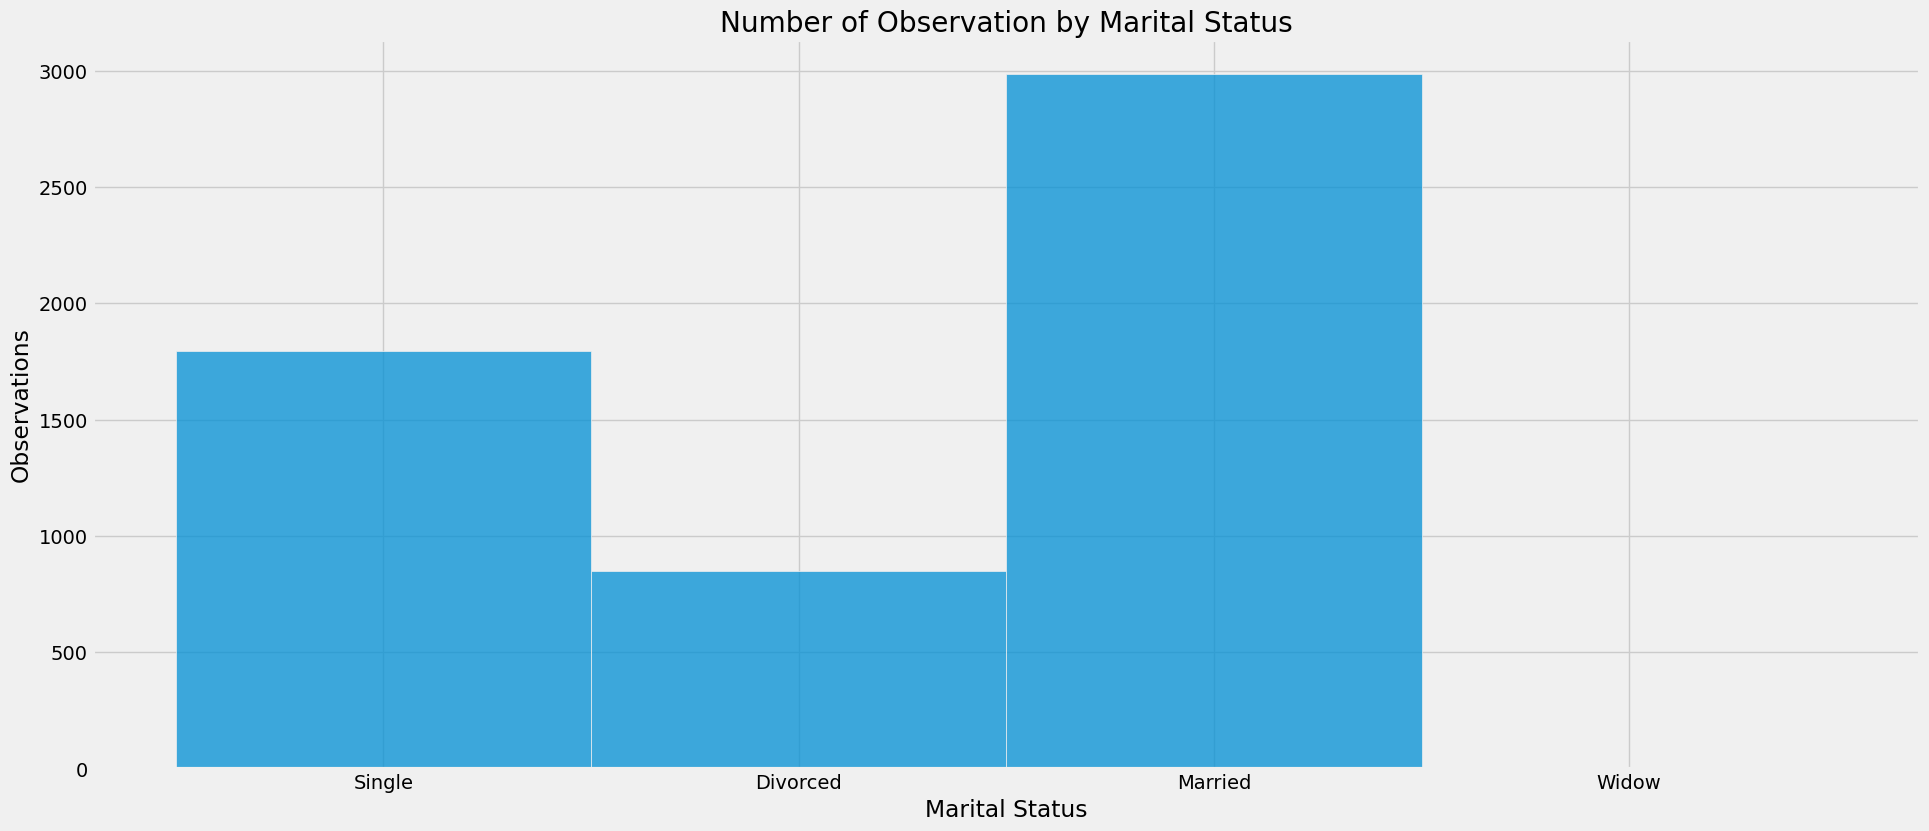

In [13]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(x='MaritalStatus', data=df.fillna('NA'))
plt.xlabel('Marital Status')
plt.ylabel('Observations')
plt.title('Number of Observation by Marital Status')
plt.show()

In [14]:
df[numerical_cols].describe(percentiles=[.01,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.00,0.00,0.0000,1.00,1.0000,1.0000,1.0
Tenure,5366.0,10.189899,8.557241,0.0,0.00,1.00,2.00,9.00,16.0000,23.00,27.0000,30.0000,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,1.00,1.00,3.0000,3.00,3.0000,3.0000,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,6.00,7.00,9.00,14.00,20.0000,30.00,33.0000,35.0000,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,2.00,2.00,3.00,3.0000,4.00,4.0000,4.0000,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,1.00,3.00,3.00,4.00,4.0000,5.00,5.0000,6.0000,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,1.00,1.00,2.00,3.00,4.0000,5.00,5.0000,5.0000,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,1.00,2.00,2.00,3.00,6.0000,8.00,10.0000,11.0000,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,0.00,0.00,1.0000,1.00,1.0000,1.0000,1.0
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,11.00,12.00,13.00,15.00,18.0000,21.00,23.0000,25.0000,26.0


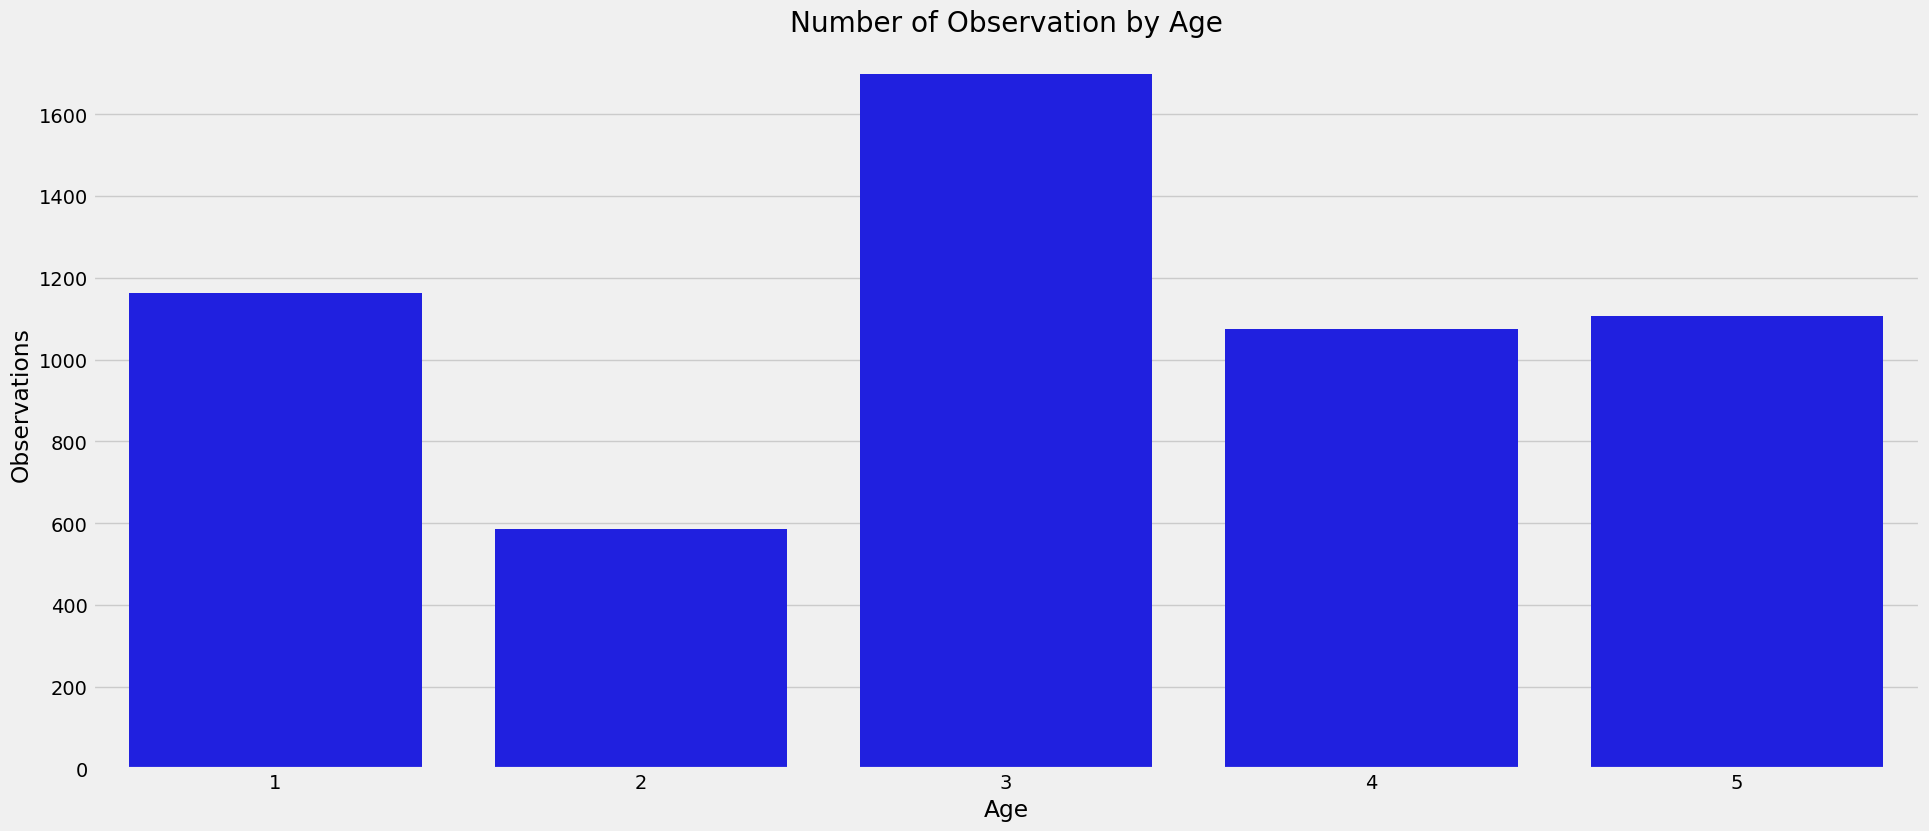

In [15]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.countplot(x='SatisfactionScore', data=df, color='blue')
plt.xlabel('Age')
plt.ylabel('Observations')
plt.title('Number of Observation by Age')
plt.show()

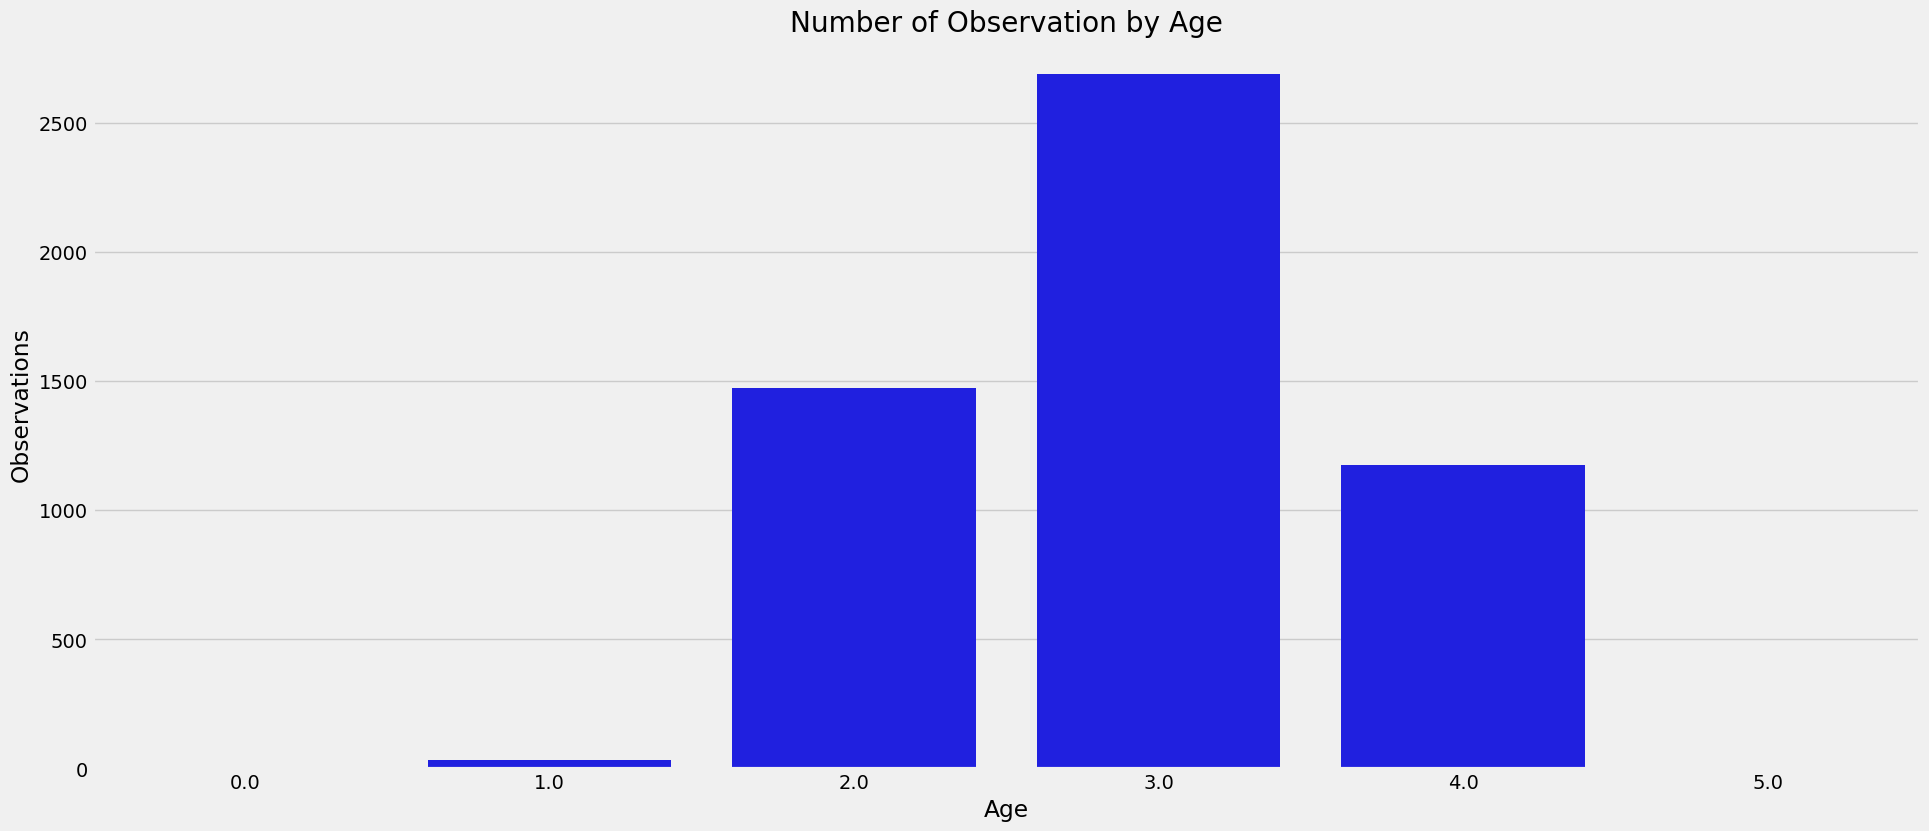

In [16]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.countplot(x='HourSpendOnApp', data=df, color='blue')
plt.xlabel('Age')
plt.ylabel('Observations')
plt.title('Number of Observation by Age')
plt.show()

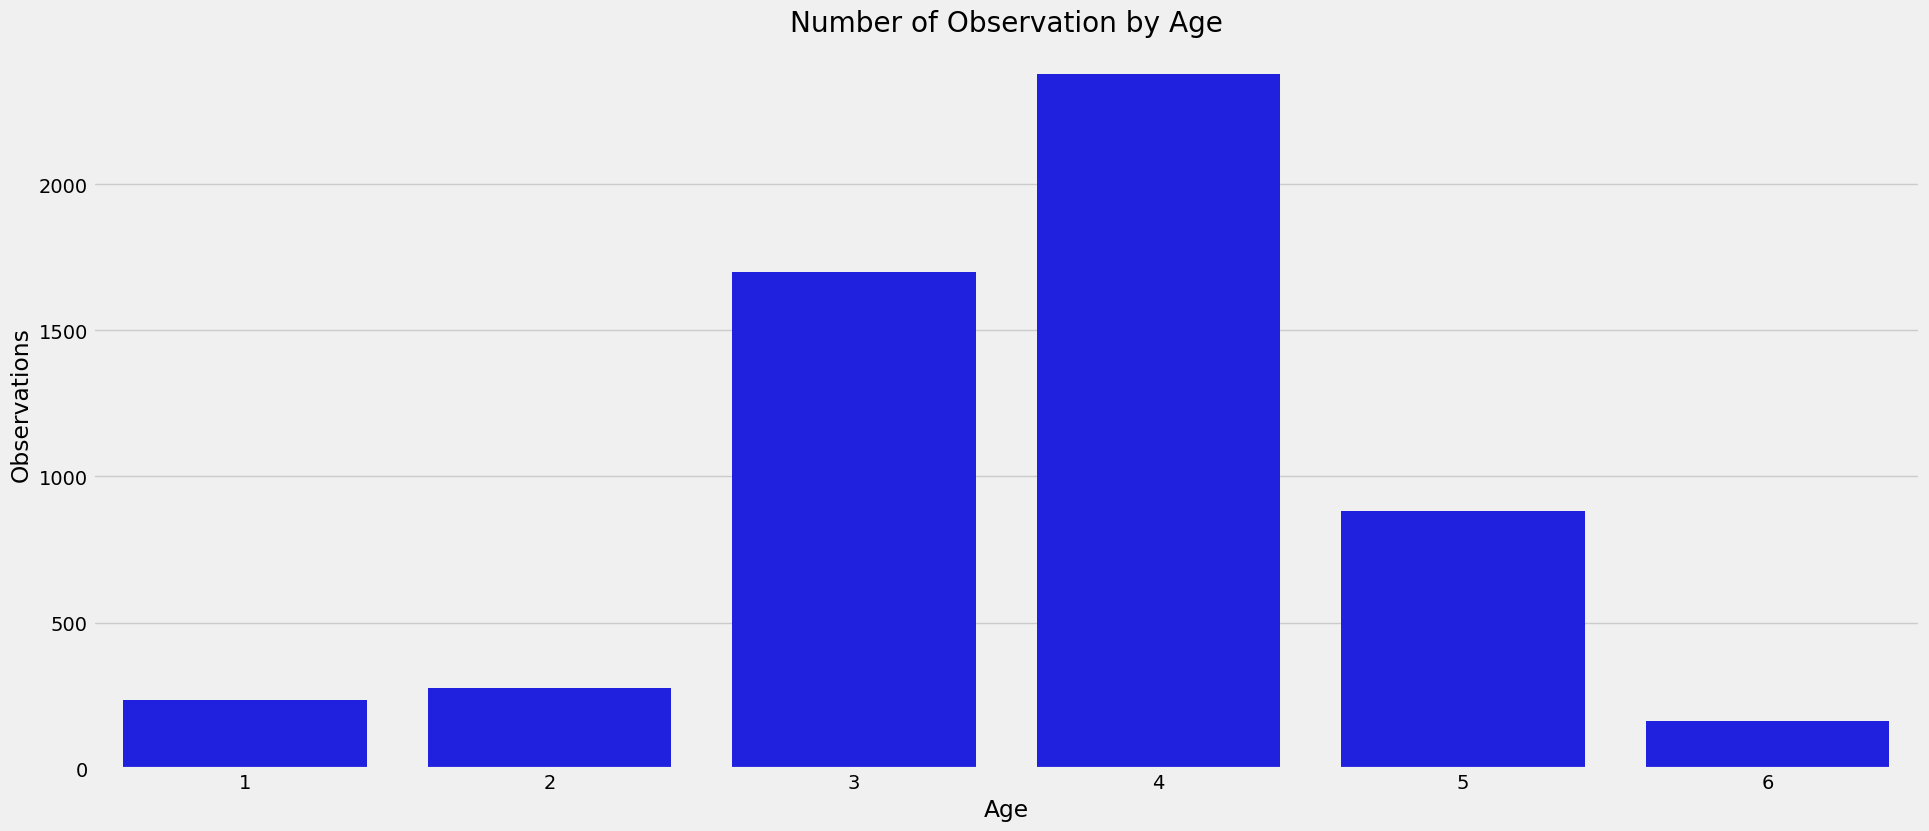

In [ ]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.countplot(x='NumberOfDeviceRegistered', data=df, color='blue')
plt.xlabel('Age')
plt.ylabel('Observations')
plt.title('Number of Observation by Age')
plt.show()

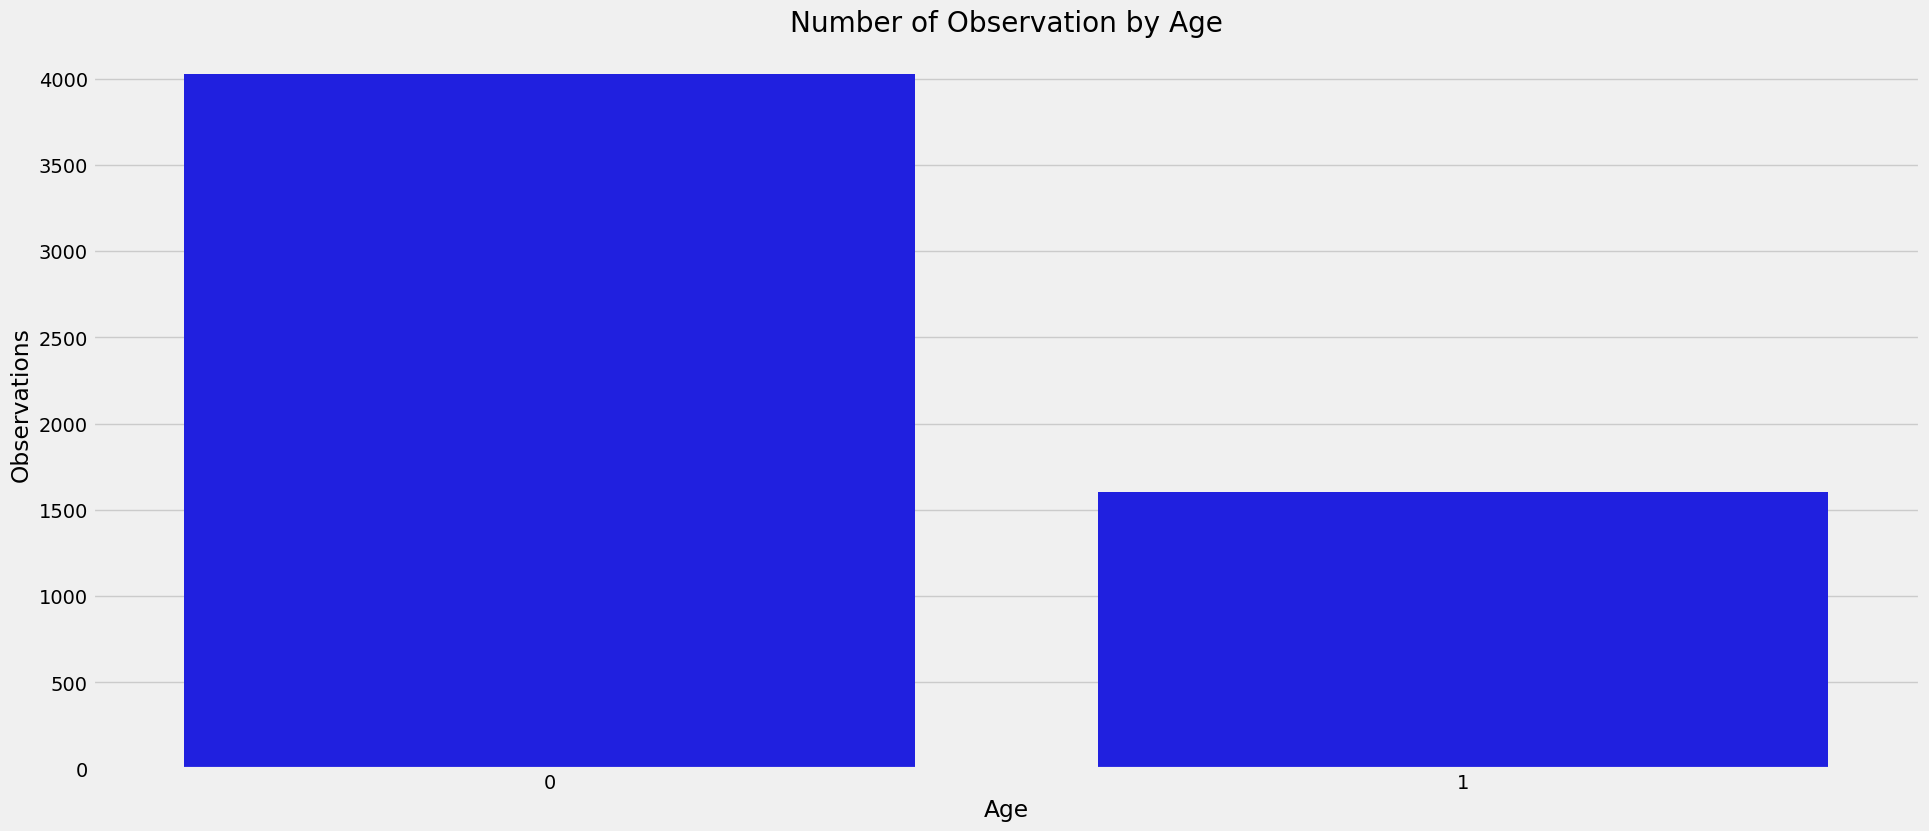

In [18]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.countplot(x='Complain', data=df, color='blue')
plt.xlabel('Age')
plt.ylabel('Observations')
plt.title('Number of Observation by Age')
plt.show()

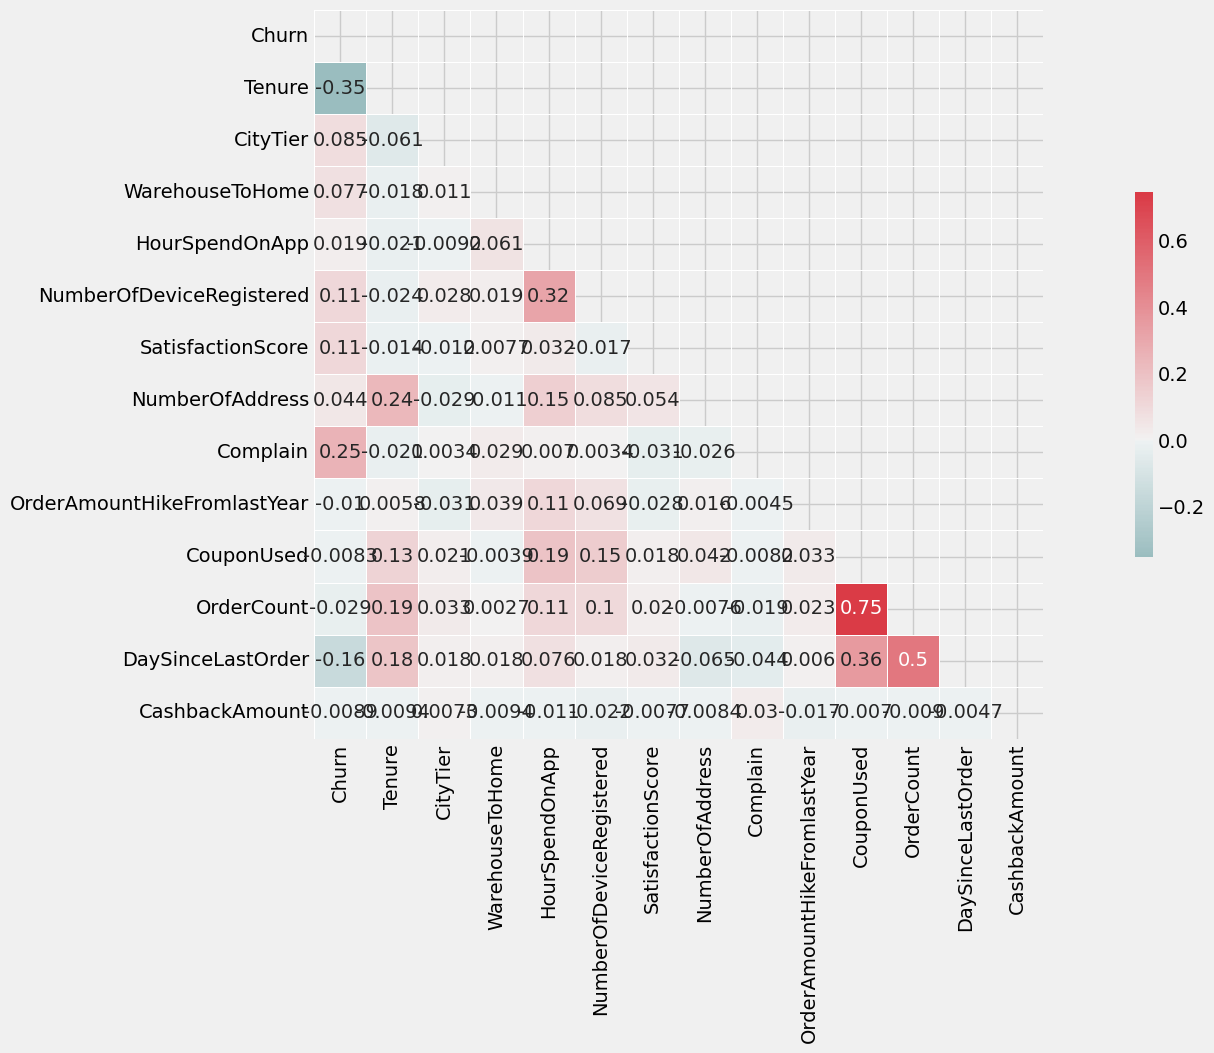

In [19]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
numerical_cols = df.select_dtypes(include=[np.number]).drop(columns='CustomerID')
corr = numerical_cols.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [20]:
df.dropna(subset=['CustomerID', 'Gender'], inplace=True) # missing very less amount
df_clean = df.copy()

In [21]:
df_clean[['CashbackAmount','Churn']].groupby('Churn').agg('mean')

,CashbackAmount
Churn,
0,608.010893
1,160.385597


In [23]:
contingecy_table = pd.crosstab(df_clean['Churn'], df_clean['CashbackAmount'])
contingecy_table

CashbackAmount,0.00,12.00,25.00,37.00,56.00,81.00,110.09,110.51,110.52,110.81,...,322.40,323.33,323.45,323.47,323.59,324.26,324.43,324.73,324.99,999999.00
Churn,,,,,,,,,,,,,,,,,,,,,
0,4,1,4,1,1,1,0,2,2,0,...,2,2,0,2,0,2,2,2,2,2
1,0,0,0,0,0,0,2,0,0,2,...,0,0,2,0,2,0,0,0,0,0


In [40]:
from scipy.stats import chi2_contingency
chi2, p_value, _, _ = chi2_contingency(contingecy_table)

In [41]:
p_value

np.float64(8.1730027548055e-138)

In [42]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypotesis. The churn rate of customers is influenced by the analyzed factor.")
else:
    print("Fail to reject the null hypotesis. We cannot say that the churn rate of customers is significantly influenced by the analyzed factor.")

Reject the null hypotesis. The churn rate of customers is influenced by the analyzed factor.


In [24]:
numerical_cols_with_null = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
    'OrderAmountHikeFromlastYear', 'CouponUsed',
    'OrderCount', 'DaySinceLastOrder'
]

for col in numerical_cols_with_null:
    median_val = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median_val)
    print(f"Filled missing values in '{col}' with median: {median_val}")

Filled missing values in 'Tenure' with median: 9.0
Filled missing values in 'WarehouseToHome' with median: 14.0
Filled missing values in 'HourSpendOnApp' with median: 3.0
Filled missing values in 'OrderAmountHikeFromlastYear' with median: 15.0
Filled missing values in 'CouponUsed' with median: 1.0
Filled missing values in 'OrderCount' with median: 2.0
Filled missing values in 'DaySinceLastOrder' with median: 3.0


In [25]:
df_clean = df_clean[df_clean['PreferredLoginDevice'] != 'N.A.'].copy()

In [26]:
df_clean.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [27]:
for column in categorical_cols:
        print("Column: {} - Unique Values: {}".format(column, df_clean[column].unique()))
        print("="*80)

Column: PreferredLoginDevice - Unique Values: ['Mobile Phone' 'Phone' 'Computer']
Column: PreferredPaymentMode - Unique Values: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Column: Gender - Unique Values: ['Female' 'Male']
Column: PreferedOrderCat - Unique Values: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Column: MaritalStatus - Unique Values: ['Single' 'Divorced' 'Married' 'Widow']


In [28]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = [
    'PreferredLoginDevice',
    'PreferredPaymentMode',
    'PreferedOrderCat',
    'MaritalStatus',
    'Gender'
]

le = LabelEncoder()

for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))


In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5621 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5621 non-null   float64
 1   Churn                        5621 non-null   int64  
 2   Tenure                       5621 non-null   float64
 3   PreferredLoginDevice         5621 non-null   int64  
 4   CityTier                     5621 non-null   int64  
 5   WarehouseToHome              5621 non-null   float64
 6   PreferredPaymentMode         5621 non-null   int64  
 7   Gender                       5621 non-null   int64  
 8   HourSpendOnApp               5621 non-null   float64
 9   NumberOfDeviceRegistered     5621 non-null   int64  
 10  PreferedOrderCat             5621 non-null   int64  
 11  SatisfactionScore            5621 non-null   int64  
 12  MaritalStatus                5621 non-null   int64  
 13  NumberOfAddress        

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_clean.drop(columns=['CustomerID']))
df_clean_scaled = pd.DataFrame(cluster_scaled, columns=df_clean.drop(columns=['CustomerID']).columns)

In [31]:
df_clean_scaled.describe()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03,5.621000e+03
mean,-1.011269e-17,-5.056344e-18,7.078882e-17,1.305169e-16,2.528172e-17,2.022538e-17,-1.042871e-17,2.427045e-16,1.213523e-16,-1.011269e-17,-1.567467e-16,-2.224791e-16,-6.067613e-17,5.751591e-17,1.719157e-16,-6.067613e-17,5.056344e-17,7.078882e-17,3.160215e-18
std,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00,1.000089e+00
min,-4.501224e-01,-1.212703e+00,-1.308701e+00,-7.147984e-01,-1.266338e+00,-2.552244e+00,-1.226744e+00,-4.160592e+00,-2.630853e+00,-1.678818e+00,-1.498078e+00,-1.756001e+00,-1.244147e+00,-6.305263e-01,-1.302019e+00,-9.245212e-01,-6.816928e-01,-1.249113e+00,-2.826495e-02
25%,-4.501224e-01,-8.538149e-01,-1.308701e+00,-7.147984e-01,-7.870053e-01,-3.941690e-01,-1.226744e+00,-1.325498e+00,-6.750238e-01,-2.617993e-01,-7.734675e-01,-2.545587e-01,-8.572614e-01,-6.305263e-01,-7.451925e-01,-3.863342e-01,-6.816928e-01,-6.891142e-01,-2.053435e-02
50%,-4.501224e-01,-1.360383e-01,1.005343e-01,-7.147984e-01,-1.878401e-01,3.251894e-01,8.151657e-01,9.204849e-02,3.028908e-01,-2.617993e-01,-4.885737e-02,-2.545587e-01,-4.703753e-01,-6.305263e-01,-1.883660e-01,-3.863342e-01,-3.344841e-01,-4.091149e-01,-1.960309e-02
75%,-4.501224e-01,5.817383e-01,1.005343e-01,1.470615e+00,5.311582e-01,3.251894e-01,8.151657e-01,9.204849e-02,3.028908e-01,1.155219e+00,6.757528e-01,1.246883e+00,6.902830e-01,1.585977e+00,6.468736e-01,1.518528e-01,1.272460e-02,7.108826e-01,-1.784771e-02
max,2.221618e+00,6.084692e+00,1.509769e+00,1.470615e+00,1.335329e+01,1.763906e+00,8.151657e-01,2.927142e+00,2.258720e+00,1.863729e+00,1.400363e+00,2.748325e+00,6.880460e+00,1.585977e+00,2.874179e+00,7.686470e+00,4.526438e+00,1.163086e+01,5.300454e+01


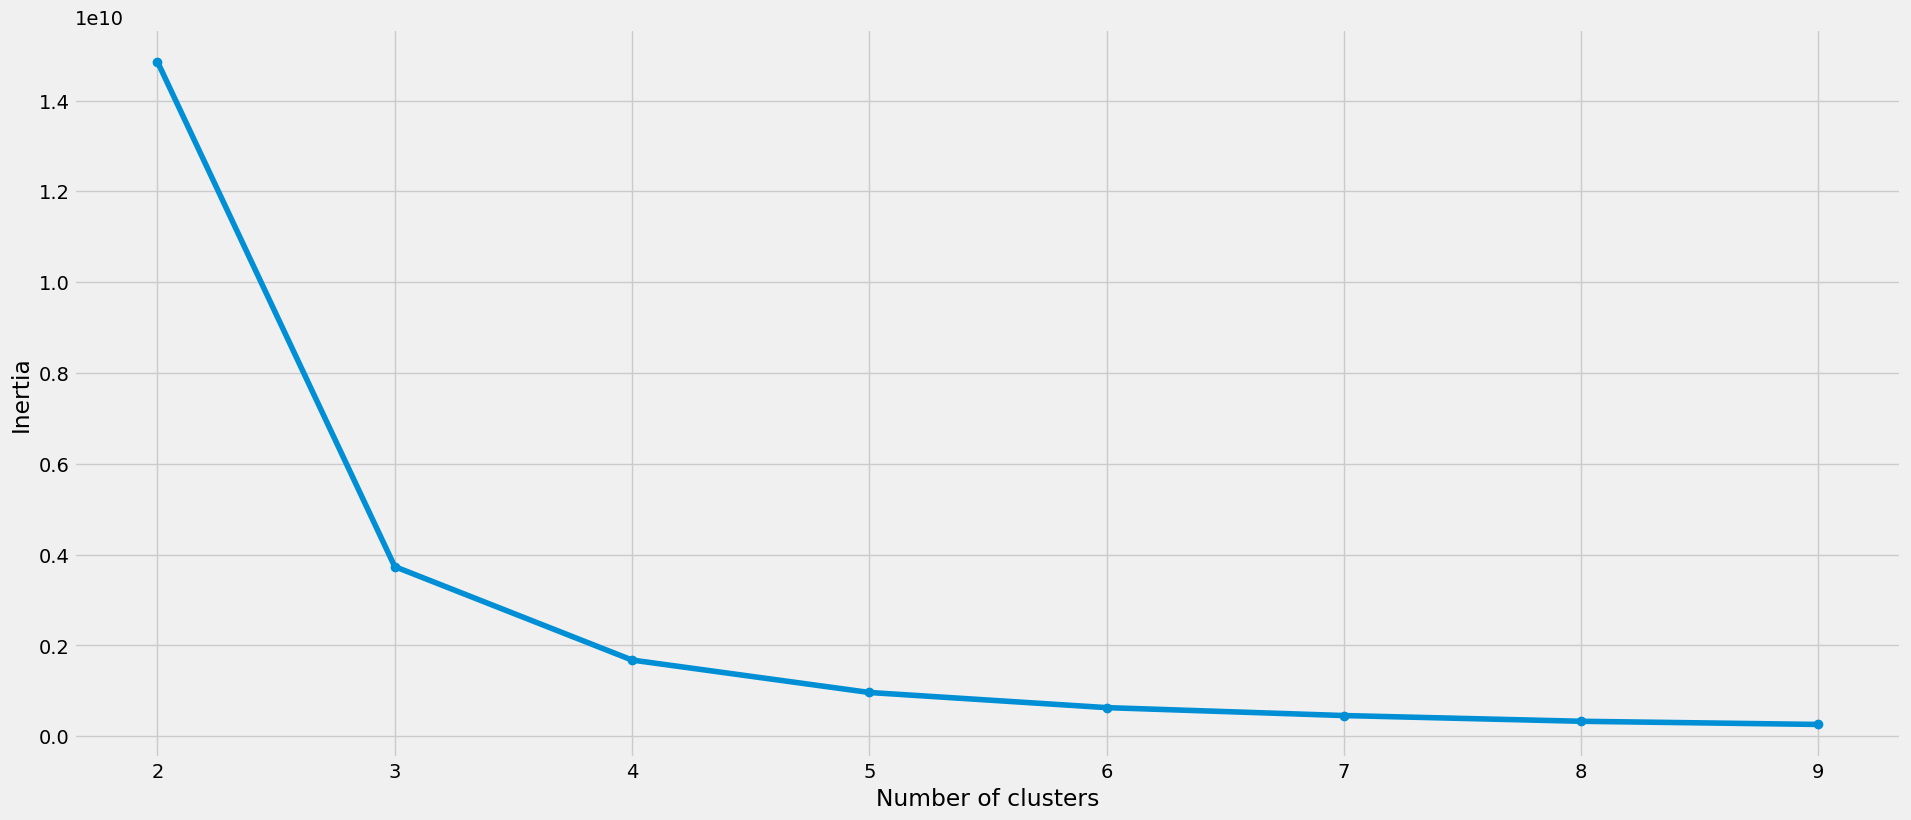

In [32]:
# USE K MEANS
from sklearn.cluster import KMeans
SSE = []
for cluster in range(2,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_clean)
    SSE.append(kmeans.inertia_)

_ = pd.DataFrame({'Cluster':range(2,10, 1), 'SSE':SSE})
plt.figure(figsize=(21,9))
plt.plot(_['Cluster'], _['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [33]:
K = 5
kmeans = KMeans(n_clusters = K, init='k-means++')
kmeans.fit(df_clean_scaled)
pred = kmeans.predict(df_clean_scaled)

In [34]:
dff = pd.DataFrame(df_clean_scaled)
dff['cluster'] = pred
dff['CustomerID'] = df_clean['CustomerID']
dff['cluster'].value_counts()

cluster
1    1533
2    1345
0    1158
3     843
4     742
Name: count, dtype: int64

In [35]:
dff

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,cluster,CustomerID
0,2.221618,-0.734185,0.100534,1.470615,-1.146504,0.325189,-1.226744,0.092048,-0.675024,-0.261799,...,1.246883,1.850941,1.585977,-1.302019,-0.386334,-0.681693,0.150884,-0.019783,3,50001.0
1,2.221618,-0.136038,1.509769,-0.714798,-0.906838,1.763906,0.815166,0.092048,0.302891,0.446710,...,1.246883,1.077169,1.585977,-0.188366,-0.924521,-0.681693,-1.249113,-0.021853,3,50002.0
2,2.221618,-0.136038,1.509769,-0.714798,1.729489,0.325189,0.815166,-1.325498,0.302891,0.446710,...,1.246883,0.690283,1.585977,-0.466779,-0.924521,-0.681693,-0.409115,-0.021886,3,50003.0
3,2.221618,-1.212703,1.509769,1.470615,-0.068007,0.325189,0.815166,-1.325498,0.302891,-0.261799,...,1.246883,1.464055,-0.630526,2.038940,-0.924521,-0.681693,-0.409115,-0.021155,3,50004.0
4,2.221618,-1.212703,1.509769,-0.714798,-0.427506,-2.552244,0.815166,0.092048,-0.675024,0.446710,...,1.246883,-0.470375,-0.630526,-1.302019,-0.386334,-0.681693,-0.409115,-0.021392,3,50005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,-0.450122,-0.016409,-1.308701,-0.714798,1.729489,-0.394169,0.815166,0.092048,-1.652938,-0.261799,...,-0.254559,0.690283,-0.630526,0.646874,-0.386334,-0.334484,-0.129116,-0.020272,2,55617.0
5617,-0.450122,0.342479,0.100534,-0.714798,-0.307673,-0.394169,0.815166,0.092048,1.280805,-1.678818,...,-0.254559,0.690283,-0.630526,0.090047,-0.386334,-0.334484,-0.409115,-0.016337,1,55618.0
5618,-0.450122,-1.093074,0.100534,-0.714798,-0.547339,0.325189,0.815166,0.092048,-1.652938,-0.261799,...,-0.254559,-0.470375,1.585977,1.482113,-0.386334,-0.334484,-0.129116,-0.018379,0,55619.0
5619,-0.450122,1.538774,-1.308701,1.470615,-0.787005,-0.394169,0.815166,1.509595,1.280805,-0.261799,...,-0.254559,-0.083489,-0.630526,-0.188366,0.151853,-0.334484,1.270881,-0.018777,1,55620.0


In [36]:
df_enh = pd.merge(dff, df, on='CustomerID')

In [37]:
df_enh.head()

,Churn_x,Tenure_x,PreferredLoginDevice_x,CityTier_x,WarehouseToHome_x,PreferredPaymentMode_x,Gender_x,HourSpendOnApp_x,NumberOfDeviceRegistered_x,PreferedOrderCat_x,...,PreferedOrderCat_y,SatisfactionScore_y,MaritalStatus_y,NumberOfAddress_y,Complain_y,OrderAmountHikeFromlastYear_y,CouponUsed_y,OrderCount_y,DaySinceLastOrder_y,CashbackAmount_y
0,2.221618,-0.734185,0.100534,1.470615,-1.146504,0.325189,-1.226744,0.092048,-0.675024,-0.261799,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,2.221618,-0.136038,1.509769,-0.714798,-0.906838,1.763906,0.815166,0.092048,0.302891,0.446710,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,2.221618,-0.136038,1.509769,-0.714798,1.729489,0.325189,0.815166,-1.325498,0.302891,0.446710,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,2.221618,-1.212703,1.509769,1.470615,-0.068007,0.325189,0.815166,-1.325498,0.302891,-0.261799,...,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,2.221618,-1.212703,1.509769,-0.714798,-0.427506,-2.552244,0.815166,0.092048,-0.675024,0.446710,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [38]:
print(df_enh.columns.tolist())


['Churn_x', 'Tenure_x', 'PreferredLoginDevice_x', 'CityTier_x', 'WarehouseToHome_x', 'PreferredPaymentMode_x', 'Gender_x', 'HourSpendOnApp_x', 'NumberOfDeviceRegistered_x', 'PreferedOrderCat_x', 'SatisfactionScore_x', 'MaritalStatus_x', 'NumberOfAddress_x', 'Complain_x', 'OrderAmountHikeFromlastYear_x', 'CouponUsed_x', 'OrderCount_x', 'DaySinceLastOrder_x', 'CashbackAmount_x', 'cluster', 'CustomerID', 'Churn_y', 'Tenure_y', 'PreferredLoginDevice_y', 'CityTier_y', 'WarehouseToHome_y', 'PreferredPaymentMode_y', 'Gender_y', 'HourSpendOnApp_y', 'NumberOfDeviceRegistered_y', 'PreferedOrderCat_y', 'SatisfactionScore_y', 'MaritalStatus_y', 'NumberOfAddress_y', 'Complain_y', 'OrderAmountHikeFromlastYear_y', 'CouponUsed_y', 'OrderCount_y', 'DaySinceLastOrder_y', 'CashbackAmount_y']


In [39]:
summary = (
    df_enh
    .groupby('cluster')
    .agg(
        nu_obs = ('CustomerID', 'count'),
        avg_tenure = ('Tenure_y', 'mean'),
        avg_warehouse_to_home = ('WarehouseToHome_y', 'mean'),
        avg_hour_spend_on_app = ('HourSpendOnApp_y', 'mean'),
        avg_satisfaction_score = ('SatisfactionScore_y', 'mean'),
        avg_order_amount_hike = ('OrderAmountHikeFromlastYear_y', 'mean'),
        avg_coupon_used = ('CouponUsed_y', 'mean'),
        avg_order_count = ('OrderCount_y', 'mean'),
        avg_day_since_last_order = ('DaySinceLastOrder_y', 'mean'),
        avg_cashback_amount = ('CashbackAmount_y', 'mean'),
        mode_gender = ('Gender_y', lambda x: x.mode()[0]),
        mode_preferred_login_device = ('PreferredLoginDevice_y', lambda x: x.mode()[0]),
        mode_preferred_payment_mode = ('PreferredPaymentMode_y', lambda x: x.mode()[0]),
        mode_prefered_order_cat = ('PreferedOrderCat_y', lambda x: x.mode()[0]),
        mode_marital_status = ('MaritalStatus_y', lambda x: x.mode()[0])
    )
    .reset_index()
    .sort_values('avg_tenure')
)


In [37]:
print(summary.head())

   cluster  nu_obs  avg_tenure  avg_warehouse_to_home  avg_hour_spend_on_app  \
2        2     847    8.846734              15.729560               2.956629   
0        0    1245    9.677362              15.320141               2.603327   
4        4    1501   10.472764              15.952124               3.313049   
3        3    1289   10.759935              15.709520               2.709493   
1        1     730   10.950774              15.251046               3.019802   

   avg_satisfaction_score  avg_order_amount_hike  avg_coupon_used  \
2                3.036600              15.873418         1.627764   
0                3.065060              15.410108         1.181513   
4                3.126582              16.075458         2.178449   
3                3.020171              15.445244         1.441494   
1                3.064384              15.766862         2.521739   

   avg_order_count  avg_day_since_last_order  avg_cashback_amount mode_gender  \
2         2.797066     

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Hyperopt
import hyperopt
from hyperopt import hp, STATUS_OK, Trials, fmin, tpe
from hyperopt.pyll.stochastic import sample

# XGboost
import xgboost as xgb

/home/capitan/.venv/tfenv/lib/python3.12/site-packages/hyperopt/atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [39]:
df_clean.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split

df_train = df_clean.copy()
X_train =  df_train.drop(columns=["CustomerID", "Churn"])
y_train= df_train["Churn"]
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [41]:
print("Original counts:\n", y_train.value_counts())
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Resampled counts:\n", y_train.value_counts())


Original counts:
 Churn
0    3739
1     757
Name: count, dtype: int64
Resampled counts:
 Churn
0    3739
1    3739
Name: count, dtype: int64


In [ ]:
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)

N_FOLDS = 10

def objective(params, n_folds = N_FOLDS):
    params['objective'] = 'binary:logistic'

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(
        dtrain=train_dmatrix,
        params=params,
        nfold=n_folds,
        num_boost_round=10000,
        early_stopping_rounds=100, 
        metrics="auc",
        as_pandas=True,
        seed=42
    )

    # Print the metrics
    loss = 1 - cv_results["test-auc-mean"].iloc[-1]
    n_estimators = cv_results["test-auc-mean"].idxmax() + 1
    return {'loss': loss, 'params': params, 'n_estimators': n_estimators, 'status': STATUS_OK}

In [48]:
hyperparameter_space = {
    'n_jobs': -1,
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 0.8),
    'subsample': hp.uniform('subsample', 0.6, 0.8),
    'min_child_weight': hp.quniform('min_child_weight', 1, 7, 2),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'max_depth': hp.randint('max_depth', 1,16),
    'gamma': hp.uniform('gamma', 0.1,0.4),
    'max_delta_step': hp.randint('max_delta_step',0,10),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2))
}

In [49]:
bayes_trials = Trials()

In [50]:
MAX_EVALS = 10

best = fmin(fn = objective, space = hyperparameter_space, algo = tpe.suggest, max_evals = MAX_EVALS, trials = bayes_trials)

100%|██████████| 10/10 [04:19<00:00, 25.95s/trial, best loss: 0.0015369568743212048]


In [54]:
best

{'colsample_bytree': np.float64(0.6744251829715827),
 'gamma': np.float64(0.18167706971175268),
 'learning_rate': np.float64(0.011746303348401434),
 'max_delta_step': np.int64(9),
 'max_depth': np.int64(14),
 'min_child_weight': np.float64(4.0),
 'reg_alpha': np.float64(0.061670465902220584),
 'reg_lambda': np.float64(0.8029938512201433),
 'subsample': np.float64(0.7758420621685032)}

In [55]:
xgb_best = xgb.XGBClassifier(**best, tree_method="hist", enable_categorical=True)

xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.6744251829715827), device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=np.float64(0.18167706971175268), grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.011746303348401434), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=np.int64(9), max_depth=np.int64(14),
              max_leaves=None, min_child_weight=np.float64(4.0), missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

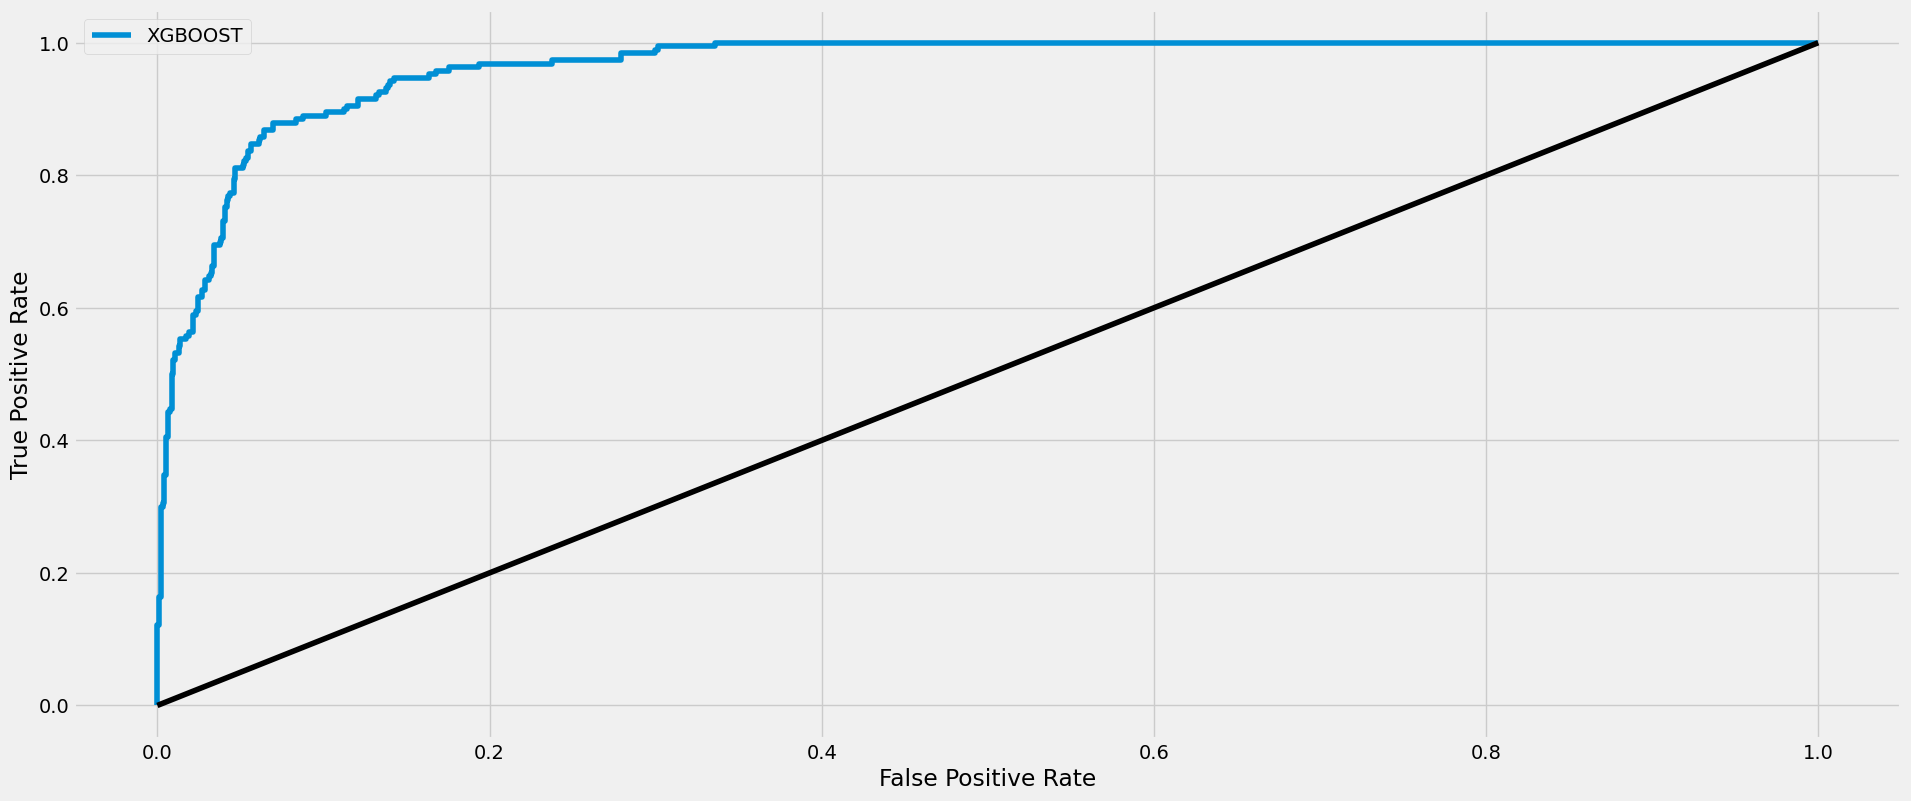

In [56]:
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, recall_score, precision_score

def add_roc_plot(model, test_x, test_y, legend_text):
    y_pred_prob = model.predict_proba(test_x)[:, 1]
    fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
    plt.plot(fpr, tpr, label=legend_text)
    plt.legend()

models_list = [xgb_best]
model_names = ['XGBOOST']

plt.figure(figsize=(21, 9))
[add_roc_plot(model, X_eval, y_eval, legend_text) for model, legend_text in zip(models_list, model_names)]

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k-")
plt.show()

In [57]:
list_scores = [roc_auc_score, recall_score, precision_score, accuracy_score]
calc_scores = []
def compute_scores(model, x_test, y_test, scores):
    return [round(score(y_test, model.predict(x_test)), 2) for score in scores]
    
[calc_scores.append(compute_scores(model, X_eval, y_eval, list_scores)) for model in models_list] 

score_names = ['roc_auc', 'recall', 'precision', 'accuracy']
scores_df = pd.DataFrame(calc_scores, columns=score_names, index=model_names)

scores_df

,roc_auc,recall,precision,accuracy
XGBOOST,0.86,0.77,0.78,0.92


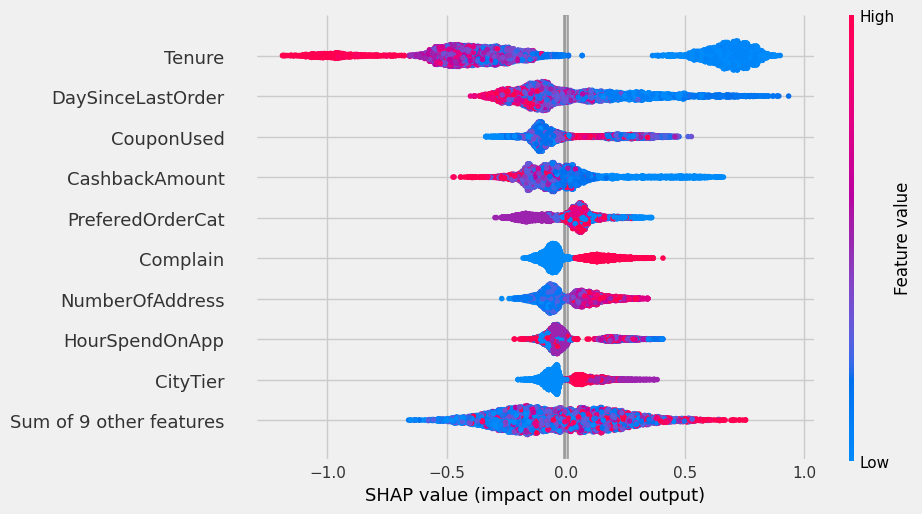

In [58]:
# print the JS visualization code to the notebook

import shap
shap.initjs()

explainer = shap.TreeExplainer(xgb_best)
shap_values =  explainer(X_train,y_train)

shap.plots.beeswarm(shap_values)